In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

df = pd.read_csv("./datasets/fixed_battery_log.csv")
df = df.drop(df.columns[0],axis=1)
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()
df["weekday"] = df["date"].dt.dayofweek
df["time_to_num"]=df["date"].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

In [3]:
def Frequency_Distribution(data, bins, class_width=None):
    data = np.asarray(data)

#     bins = np.arange(0, 110, 10)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))

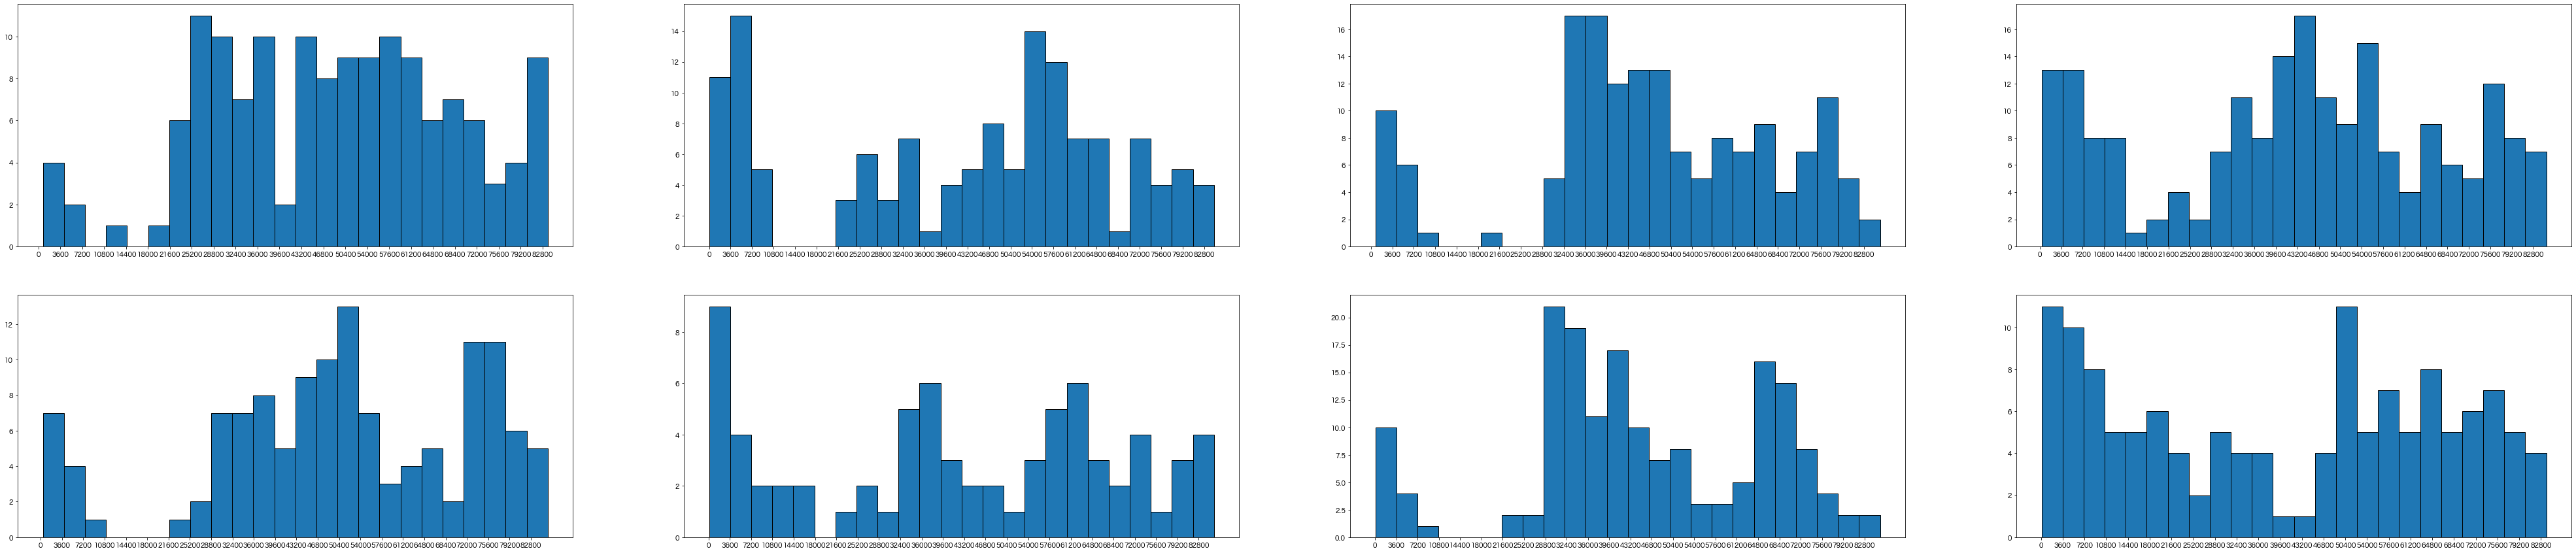

In [5]:
# hist plot - simple
plt.figure(figsize=(70,15))
# fuse_users = [x for x in range(0,8)] 
x_range = np.arange(0,86400,3600)

for i in range(len(users)):
    plt.subplot(2,4,i+1)
    plt.xticks(x_range)
    plt.hist(df.loc[(df["User"] == users[i]) & 
                    (df["state"] == "ON") & 
                    (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,1,31))]["time_to_num"],
#              range=(0,86400),
             bins=24,
             ec="black"
            )
#     user_data.plot.bar(x="階級値",y="度数",width=1,ec="k")
#     plt.savefig("bs_2_results/hist_plot_simple_time.jpg")

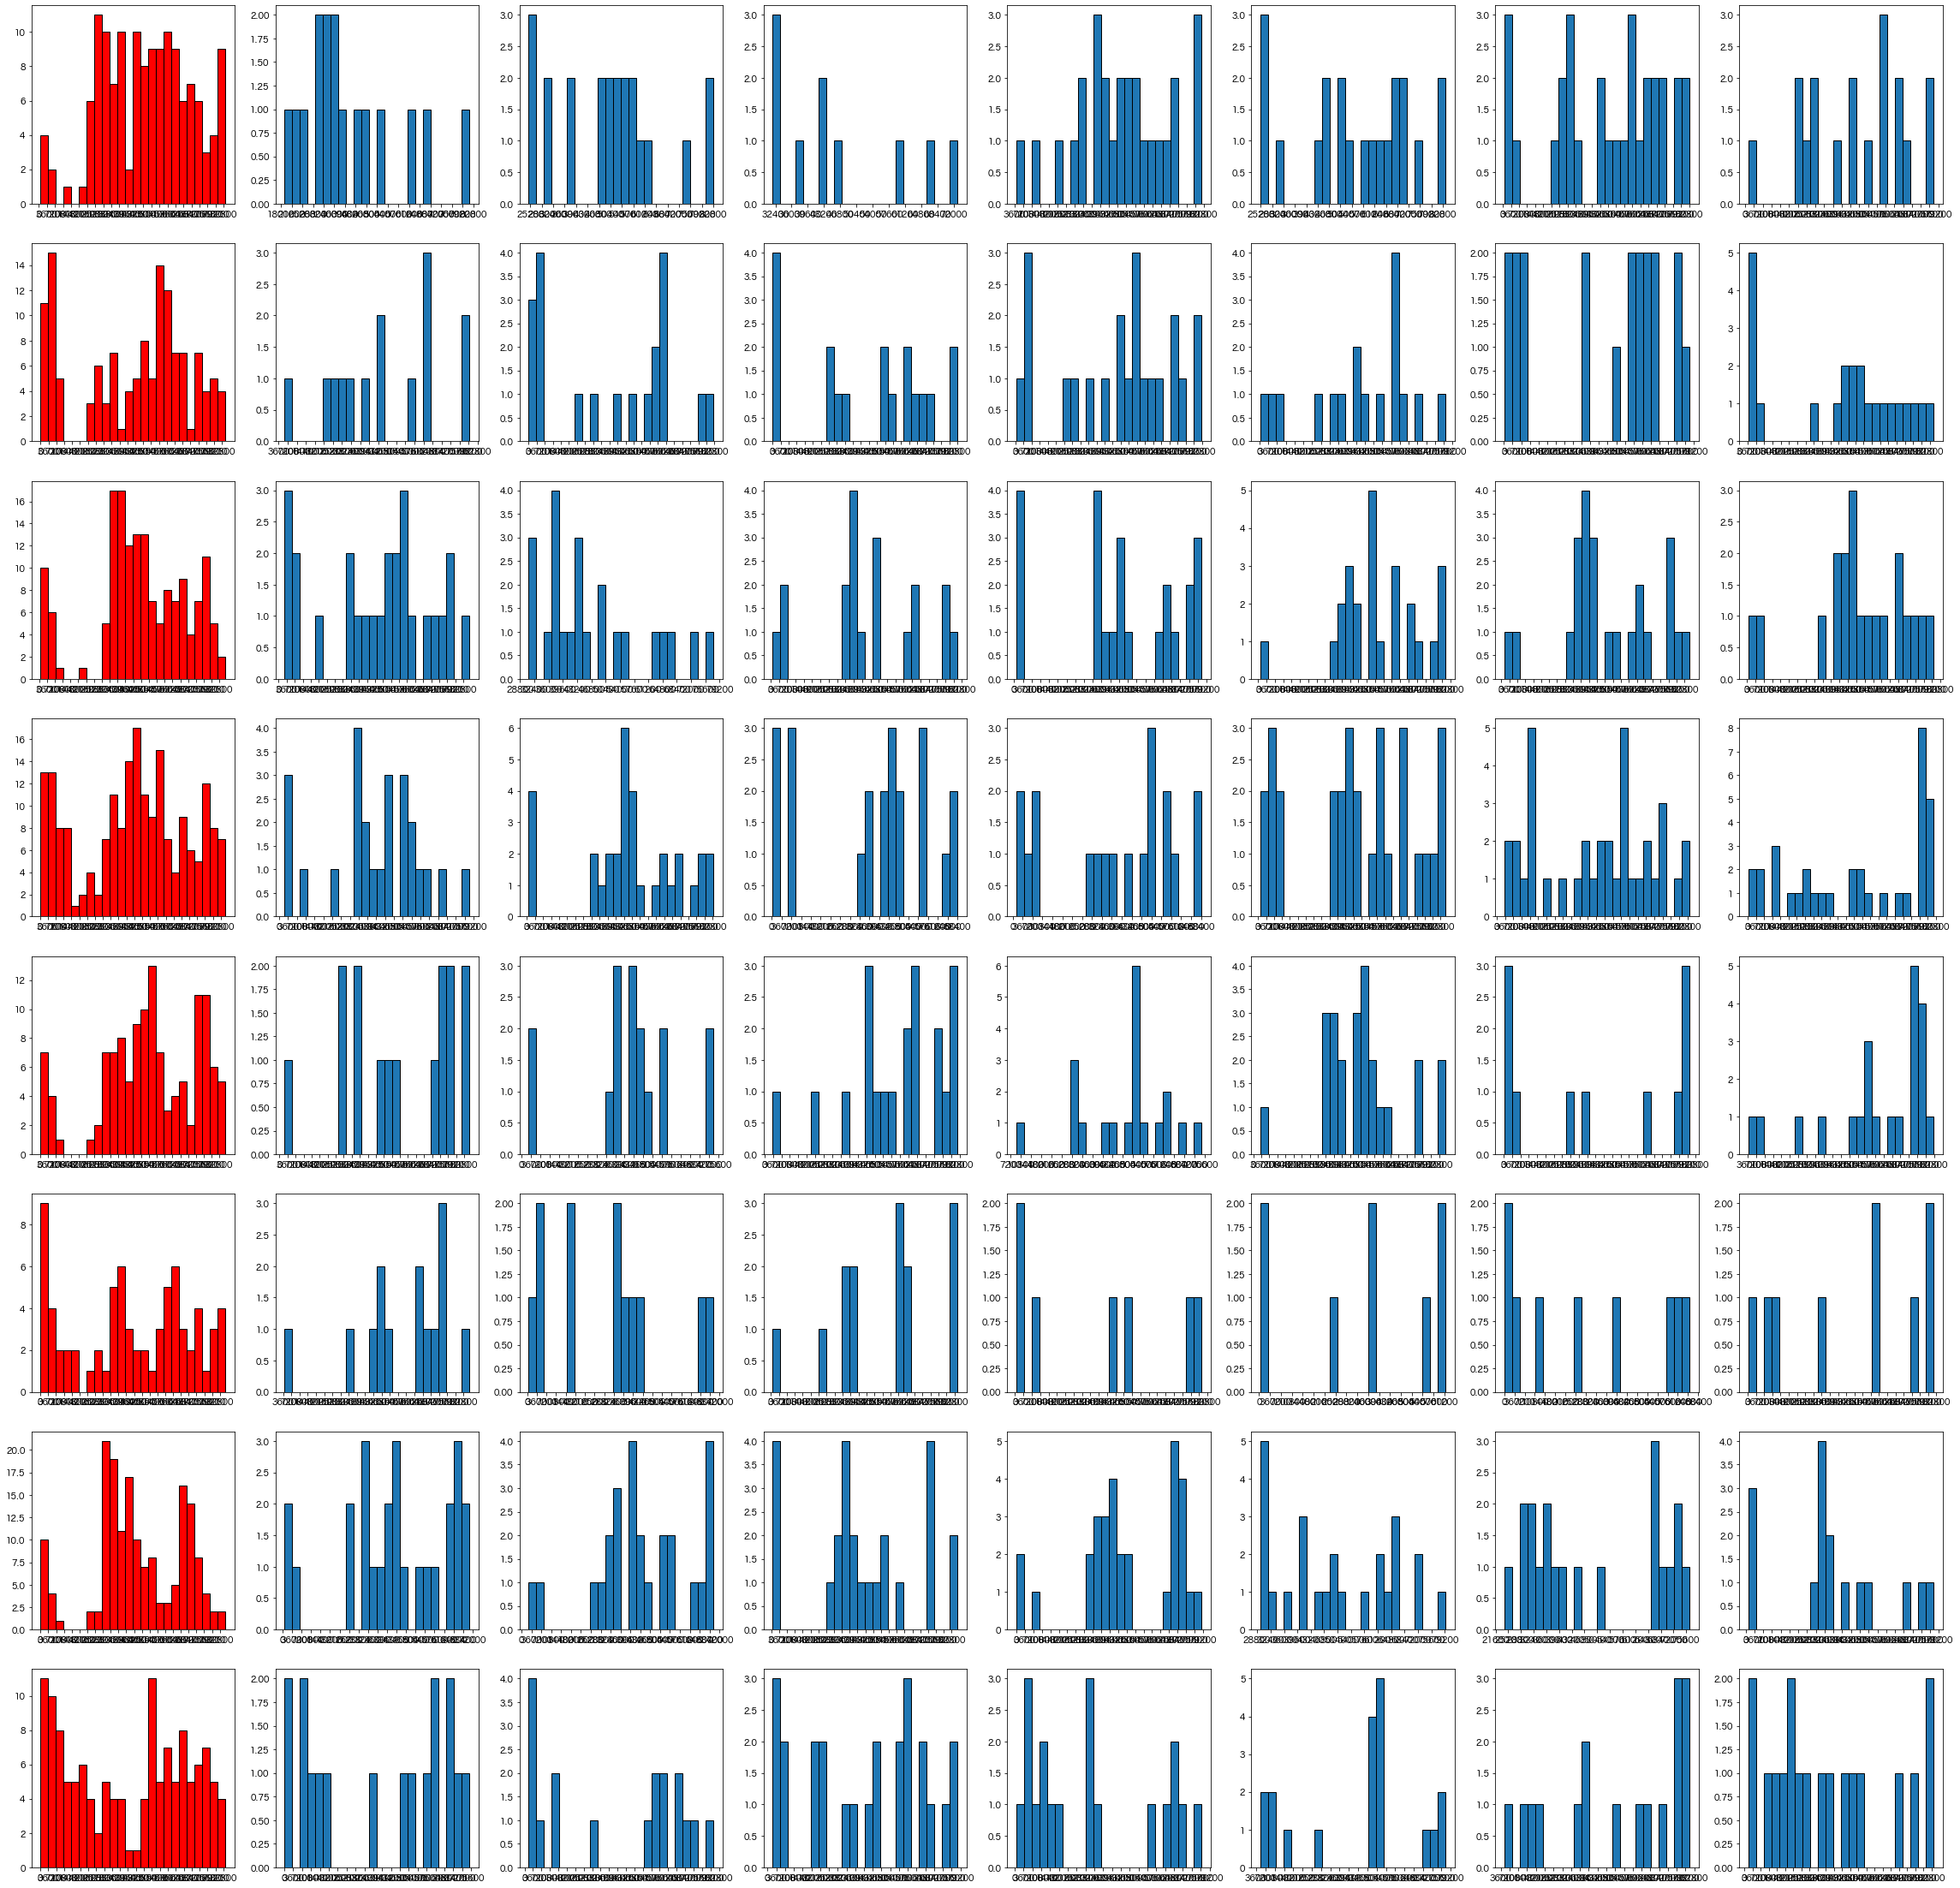

In [7]:
#hist plot - +weekday
plt.figure(figsize=(40,40))
# fuse_users = [x for x in range(0,8)]
x_range = np.arange(0,86400,3600)

for i in range(len(users)):
    plt.subplot(8,8,1+i*8)
    plt.xticks(x_range)
    plt.hist(df.loc[(df["User"] == users[i]) & 
                    (df["state"] == "ON") & 
                    (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,1,31))]["time_to_num"],
             bins=24,
             ec="black",
             color="red"
            )
    for j in range(0,7):
        plt.subplot(8,8,(j+2)+i*8)
        plt.xticks(x_range)
        plt.hist(df.loc[(df["User"] == users[i]) & 
                        (df["state"] == "ON") & 
                        (df["date"] > dt.datetime(2021,12,1)) & 
                        (df["date"] < dt.datetime(2022,1,31)) &
                        (df["weekday"] == j)]["time_to_num"],
                 bins=24,
                 ec="black"
                )
plt.savefig("bs_2_results/hist_plot_plus_weekday_time_mini.jpg")